In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

C:\Users\vivek\AppData\Local\Temp\ipykernel_16868\1994989634.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [ ]:
circ = QuantumCircuit(3)

In [ ]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

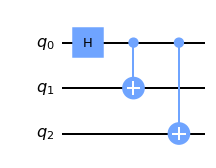

In [ ]:
circ.draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector

state  = Statevector.from_int(0, 2**3)

state = state.evolve(circ)

state.draw('latex')



<IPython.core.display.Latex object>

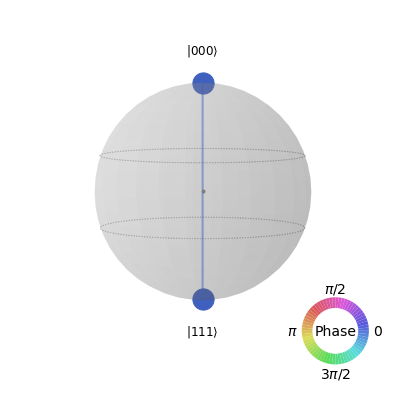

In [ ]:
state.draw("qsphere")

In [ ]:
from qiskit.quantum_info import Operator
U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

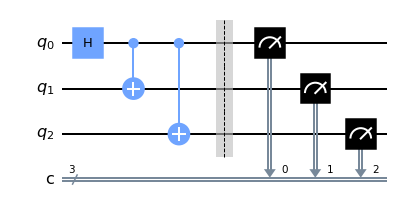

In [ ]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qc = meas.compose(circ, range(3), front = True)
qc.draw('mpl')

In [ ]:
from qiskit import transpile

from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)

result_sim = job_sim.result()

In [ ]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 503, '000': 521}


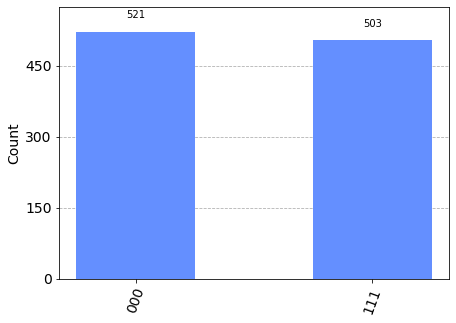

In [ ]:
from qiskit.visualization import plot_histogram 
plot_histogram(counts)

In [ ]:
from qiskit import Aer

backend = Aer.get_backend('statevector_simulator')


In [ ]:
job = backend.run(circ)


In [ ]:
result = job.result()


In [ ]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)


Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)
